<h1>1.Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.</h1>

In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.DataFrame({
    "norm1": np.random.randn(20),
    "gamma": np.random.gamma(shape=2, scale=4, size=20),
    "norm2":np.random.normal(loc=10,scale=3,size=20),
    "uniform": np.random.uniform(0,20,size=20),
    "poisson": np.random.poisson(5, size=20),
    "gumbel":np.random.gumbel(5, 3, 20)
})

df

,norm1,gamma,norm2,uniform,poisson,gumbel
0,0.152057,5.996708,2.477779,15.334660,4,5.811676
1,-0.384013,5.348437,6.160242,0.842135,5,3.035042
2,0.109929,1.799746,5.205353,12.460438,5,5.948722
3,-0.831773,5.940274,11.778642,17.946201,5,7.200834
4,-0.037440,3.086657,10.256726,12.042272,6,4.425709
5,1.419294,4.339493,5.975949,15.808984,4,2.229341
6,0.692564,8.955958,10.902457,6.127059,9,6.634234
7,-0.720299,3.158487,4.038412,12.087218,1,6.344620
8,-0.260780,25.383347,11.277690,5.955263,2,5.682552
9,0.647269,19.395268,10.242040,10.828084,6,9.572075


<h1>2.Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних. Детальний опис роботи критерію та приклад його розрахунку: https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf</h1>

In [28]:
df = df.apply(lambda x: x.sort_values().values)
n = int(df.shape[0])
a=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def myFunction(data):
    if n % 2 == 0:
        k = int(n/2)
    else:
        k = int((n-1)/2)
    
    mn = np.mean(data)
    nm2 = 0
    
    for i in range(n):
        nm2 = nm2 + (data[i] - mn)**2
        
    b = 0
    for i in range (k):
        b += a[i] * (data[n-i-1] - data[i])
        
    w = (b**2)/nm2
    return w
df

,norm1,gamma,norm2,uniform,poisson,gumbel
0,-1.858848,1.799746,2.179834,0.842135,1,2.229341
1,-0.903580,3.086657,2.477779,1.118890,2,3.035042
2,-0.831773,3.158487,4.038412,4.991366,3,3.726495
3,-0.730615,3.983608,4.493669,5.955263,4,4.425709
4,-0.720299,4.339493,5.205353,6.127059,4,4.454806
5,-0.662346,4.751431,5.975949,8.524496,4,5.682552
6,-0.569415,5.348437,6.160242,8.785722,4,5.811676
7,-0.384013,5.940274,7.964103,8.806928,5,5.948722
8,-0.260780,5.996708,8.812559,10.828084,5,6.344620
9,-0.037440,7.107181,10.242040,11.850158,5,6.634234


In [29]:
myFunction(df["norm1"])

0.9724724670816314

<h1>3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution. Шаблон таблиці: https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing</h1>

In [30]:
names = ["Variable", "Statistics", "Distribution"]
table = pd.DataFrame(columns = names)
table

,Variable,Statistics,Distribution


<h1>4. Занести в стовпчик Variable назви змінних.</h1>

In [31]:
table["Variable"] = df.keys()
table

,Variable,Statistics,Distribution
0,norm1,NaN,NaN
1,gamma,NaN,NaN
2,norm2,NaN,NaN
3,uniform,NaN,NaN
4,poisson,NaN,NaN
5,gumbel,NaN,NaN


<h1>5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".</h1>

In [32]:
table["Distribution"] = ['normal' if 'norm' in i else 'non-normal' for i in table['Variable']]
table

,Variable,Statistics,Distribution
0,norm1,NaN,normal
1,gamma,NaN,non-normal
2,norm2,NaN,normal
3,uniform,NaN,non-normal
4,poisson,NaN,non-normal
5,gumbel,NaN,non-normal


<h1>6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].</h1>

In [33]:
for i in range(table.shape[0]):
    if 'norm' in table["Variable"][i]:
        table['Statistics'][i] = f'{df[table["Variable"][i]].mean()} {[df[table["Variable"][i]].std()]}'
table

,Variable,Statistics,Distribution
0,norm1,-0.03707417471320986 [0.8094053028787829],normal
1,gamma,NaN,non-normal
2,norm2,9.11932908891756 [4.107130635658113],normal
3,uniform,NaN,non-normal
4,poisson,NaN,non-normal
5,gumbel,NaN,non-normal


<h1>7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].</h1>

In [34]:
for i in range (table.shape[0]):
    cur = table["Variable"][i]
    if 'norm' not in cur:
        table["Statistics"][i] =f'{df[cur].median()}[{df[cur].quantile(0.25)} {df[cur].quantile(0.75)}]'

table

,Variable,Statistics,Distribution
0,norm1,-0.03707417471320986 [0.8094053028787829],normal
1,gamma,8.031569756837374[4.648446896844785 13.1592614...,non-normal
2,norm2,9.11932908891756 [4.107130635658113],normal
3,uniform,11.946215300394933[7.925136614780027 14.419299...,non-normal
4,poisson,5.0[4.0 6.0],non-normal
5,gumbel,6.721550128451691[5.375615518965002 9.55385769...,non-normal


<h1>8. Зберегти таблицю в пдф форматі</h1>

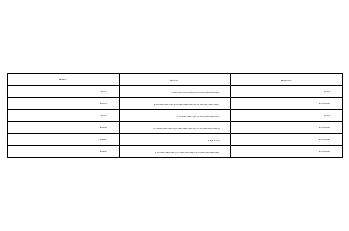

In [35]:
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
fig = plt.figure()
ax=fig.add_subplot(111)

cell_text = []
for row in range(len(table)):
    cell_text.append(table.iloc[row])

ax.table(cellText=cell_text, colLabels=table.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("table.pdf")
pdf.savefig(fig)
pdf.close()
